In [1]:
#Import Necessary Libraries

import numpy as np
import os
import cv2
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

# EDA (Exploratory Data Analysis)

In [2]:
# Path to the training data directory
train_data_dir = r"D:\ExcelR\Data Science\Project\Facial Emotion Recognition\train"

In [3]:
# Dictionary mapping emotion labels to integers
emotions = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}

In [4]:
# List to store the number of images per emotion
num_images_per_emotion = [0] * len(emotions)

In [5]:
# Function to load and display a random image from each emotion
def display_random_images(data_dir, emotions):
    plt.figure(figsize=(12, 10))
    for i, emotion in enumerate(emotions.keys()):
        emotion_path = os.path.join(data_dir, emotion)
        image_files = os.listdir(emotion_path)
        random_image_file = np.random.choice(image_files)
        random_image_path = os.path.join(emotion_path, random_image_file)
        image = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)
        num_images_per_emotion[i] = len(image_files)
        plt.subplot(2, 4, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(emotion)
        plt.axis('off')
    plt.show()

In [6]:
# Function to plot the distribution of images across emotions
def plot_image_distribution(emotions, num_images_per_emotion):
    plt.figure(figsize=(10, 6))
    plt.bar(emotions.keys(), num_images_per_emotion)
    plt.xlabel('Emotion')
    plt.ylabel('Number of Images')
    plt.title('Image Distribution across Emotions')
    plt.show()

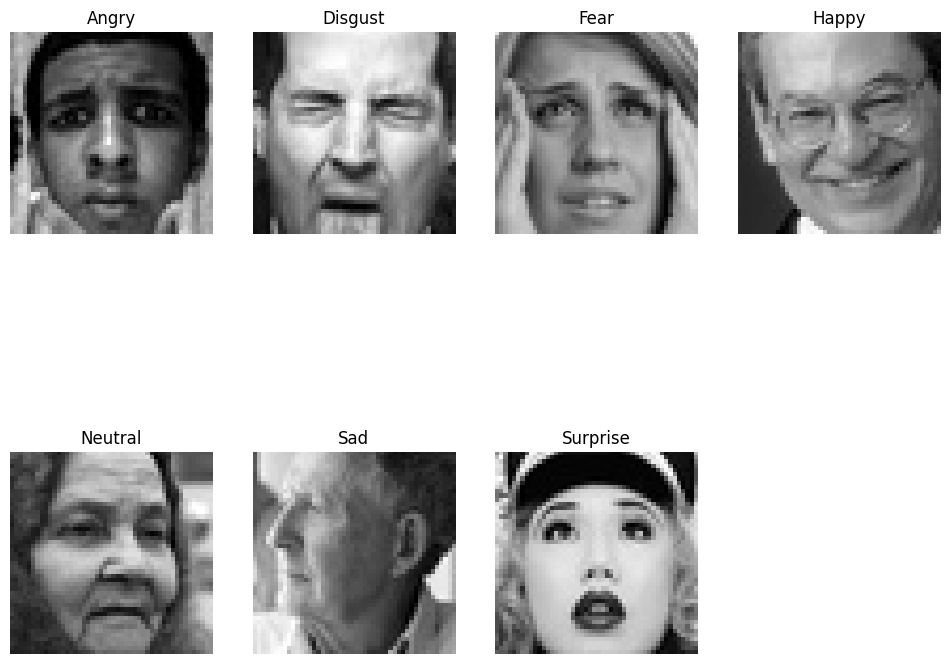

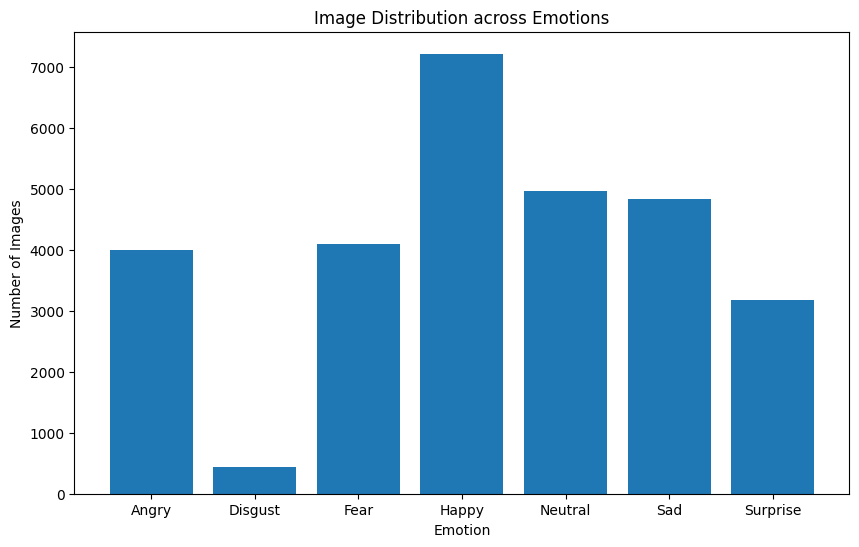

In [7]:
# Perform EDA
display_random_images(train_data_dir, emotions)
plot_image_distribution(emotions, num_images_per_emotion)

# Model Building

# # Step 1: Data Augmentation

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# # Step 2: Create an ImageDataGenerator for training and testing data

In [9]:
train_data_dir = r"D:\ExcelR\Data Science\Project\Facial Emotion Recognition\train"
test_data_dir = r"D:\ExcelR\Data Science\Project\Facial Emotion Recognition\test"
input_shape = (48, 48, 1)
batch_size = 64

In [10]:
# Create ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

Found 28709 images belonging to 7 classes.


In [11]:
# Create ImageDataGenerator for testing data
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False
)

Found 7174 images belonging to 7 classes.


## Step 3: Build the Convolutional Neural Network (CNN) Model 

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Output classes for emotions (7 classes)
])

# # Step 4: Compile the Model with Adam Optimizer

In [13]:
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# # Step 5: Train the Model with Data Augmentation

In [14]:
num_epochs = 50
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=num_epochs
)

Epoch 1/50
448/448 [==============================] - 48s 105ms/step - loss: 1.7313 - accuracy: 0.2982
Epoch 2/50
448/448 [==============================] - 35s 79ms/step - loss: 1.5032 - accuracy: 0.4184
Epoch 3/50
448/448 [==============================] - 35s 79ms/step - loss: 1.3889 - accuracy: 0.4684
Epoch 4/50
448/448 [==============================] - 35s 78ms/step - loss: 1.3198 - accuracy: 0.4992
Epoch 5/50
448/448 [==============================] - 34s 75ms/step - loss: 1.2622 - accuracy: 0.5232
Epoch 6/50
448/448 [==============================] - 35s 79ms/step - loss: 1.2092 - accuracy: 0.5420
Epoch 7/50
448/448 [==============================] - 35s 78ms/step - loss: 1.1638 - accuracy: 0.5615
Epoch 8/50
448/448 [==============================] - 35s 79ms/step - loss: 1.1261 - accuracy: 0.5766
Epoch 9/50
448/448 [==============================] - 35s 79ms/step - loss: 1.0830 - accuracy: 0.5898
Epoch 10/50
448/448 [==============================] - 35s 79ms/step - loss: 1.04

# # Step 6: Save the Model

In [15]:
model.save('emotion_recognition_model_augmented.h5')

C:\Users\Suraj\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# # Step 7: Load the Model for Predictions on Unseen Testing Data

In [16]:
loaded_model = load_model('emotion_recognition_model_augmented.h5')

# # Step 8: Use the Loaded Model to Predict on Unseen Testing Data

In [17]:
test_generator.reset()
y_pred = loaded_model.predict(test_generator, steps=test_generator.n // test_generator.batch_size + 1)
predicted_emotion_labels = np.argmax(y_pred, axis=1)
true_labels = test_generator.classes

113/113 [==============================] - 7s 63ms/step


# # Step 9: Calculate the Accuracy on Unseen Testing Data

In [18]:
accuracy = np.mean(predicted_emotion_labels == true_labels)
print(f"Accuracy on Unseen Testing Data: {accuracy * 100:.2f}%")

Accuracy on Unseen Testing Data: 56.37%


## Step 10: Generate and Display the Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

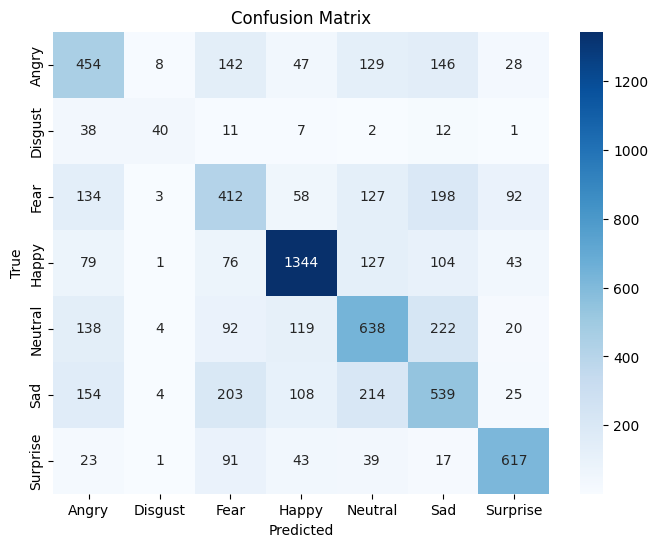

In [19]:
cm = confusion_matrix(true_labels, predicted_emotion_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# # Step 11: Generate and Display the Classification Report

In [20]:
target_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(true_labels, predicted_emotion_labels, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       Angry       0.45      0.48      0.46       954
     Disgust       0.66      0.36      0.47       111
        Fear       0.40      0.40      0.40      1024
       Happy       0.78      0.76      0.77      1774
     Neutral       0.50      0.52      0.51      1233
         Sad       0.44      0.43      0.43      1247
    Surprise       0.75      0.74      0.74       831

    accuracy                           0.56      7174
   macro avg       0.57      0.53      0.54      7174
weighted avg       0.57      0.56      0.56      7174

